In [32]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

1. Reading and Inspection

In [33]:
df= pd.read_csv('/Users/acer/SANBERCODE/PROYEK AKHIR/Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [34]:
data_dict = pd.read_csv('/Users/acer/SANBERCODE/PROYEK AKHIR/Data_Negara_HELP.csv')
data_dict.head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200
5,Argentina,14.5000,18.9000,8.1000,16.0000,18700,20.9000,75.8000,2.3700,10300
6,Armenia,18.1000,20.8000,4.4000,45.3000,6700,7.7700,73.3000,1.6900,3220
7,Australia,4.8000,19.8000,8.7300,20.9000,41400,1.1600,82.0000,1.9300,51900
8,Austria,4.3000,51.3000,11.0000,47.8000,43200,0.8730,80.5000,1.4400,46900
9,Azerbaijan,39.2000,54.3000,5.8800,20.7000,16000,13.8000,69.1000,1.9200,5840


In [35]:
df.shape

(167, 10)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [37]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


2. Cleaning the data

In [38]:
print('Total missing values in the data')
print('-'*50)
print(df.isnull().sum())

Total missing values in the data
--------------------------------------------------
Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64


In [39]:
df['Ekspor'] = df['Ekspor'] * df['GDPperkapita']/100
df['Impor'] = df['Impor'] * df['GDPperkapita']/100
df['Kesehatan'] = df['Kesehatan'] * df['GDPperkapita']/100

In [40]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


3. Data Visualization

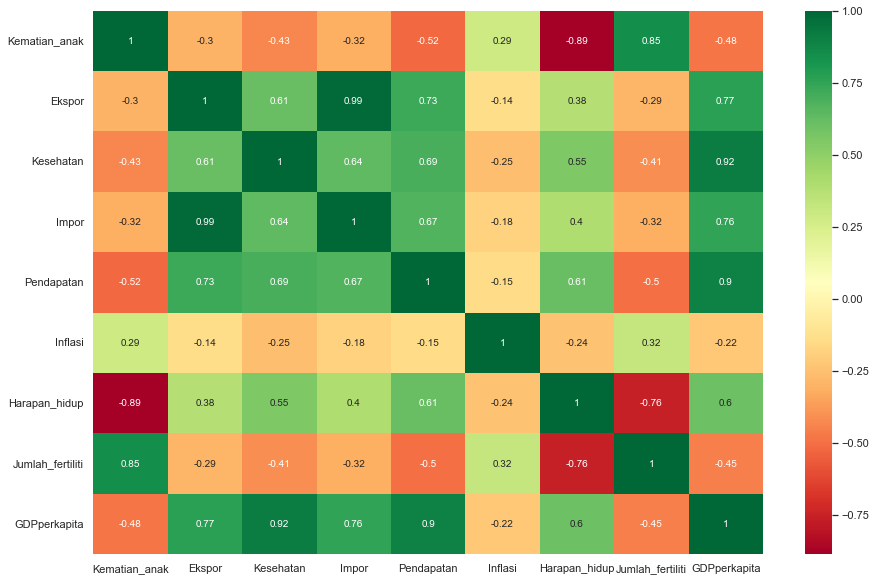

In [41]:
plt.figure(figsize = (15,10))        
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')

plt.show()

- Kematian pada anak sangat berkorelasi tinggi dengan jumlah fertiliti memiliki koefisien sebesar 0,85
- Impor dan Ekspor, Kesehatan dan GDPperkapita, Pendapatan dan GDPperkapita saling berkolerasi
- Angka harapan hidup menghasilkan kolerasi negatif dengan jumlah fertiliti sebesar -0,76
- Kematian pada anak memiliki kolerasi negatif yang tinggi dengan harapan hidup

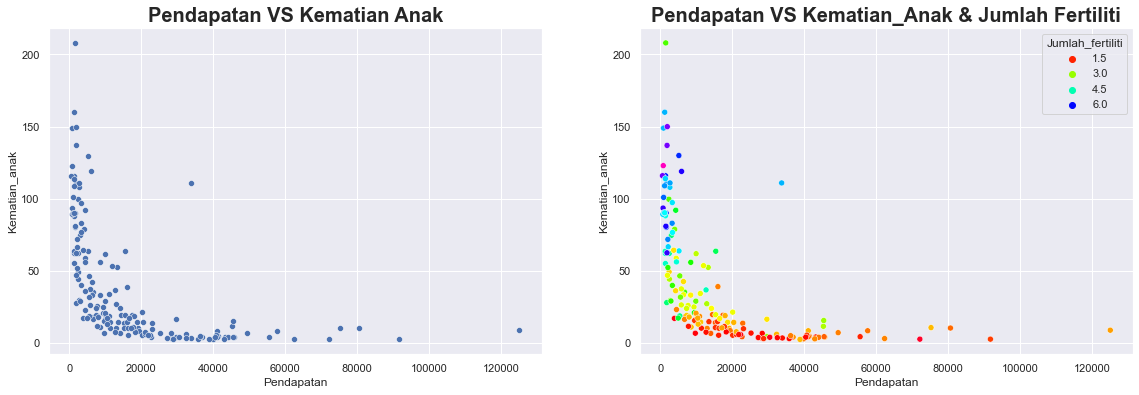

In [42]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Pendapatan',y='Kematian_anak', data=df)
plt.title('Pendapatan VS Kematian Anak',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='Pendapatan',y='Kematian_anak',hue='Jumlah_fertiliti', data=df, palette='gist_rainbow')
plt.title('Pendapatan VS Kematian_Anak & Jumlah Fertiliti',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

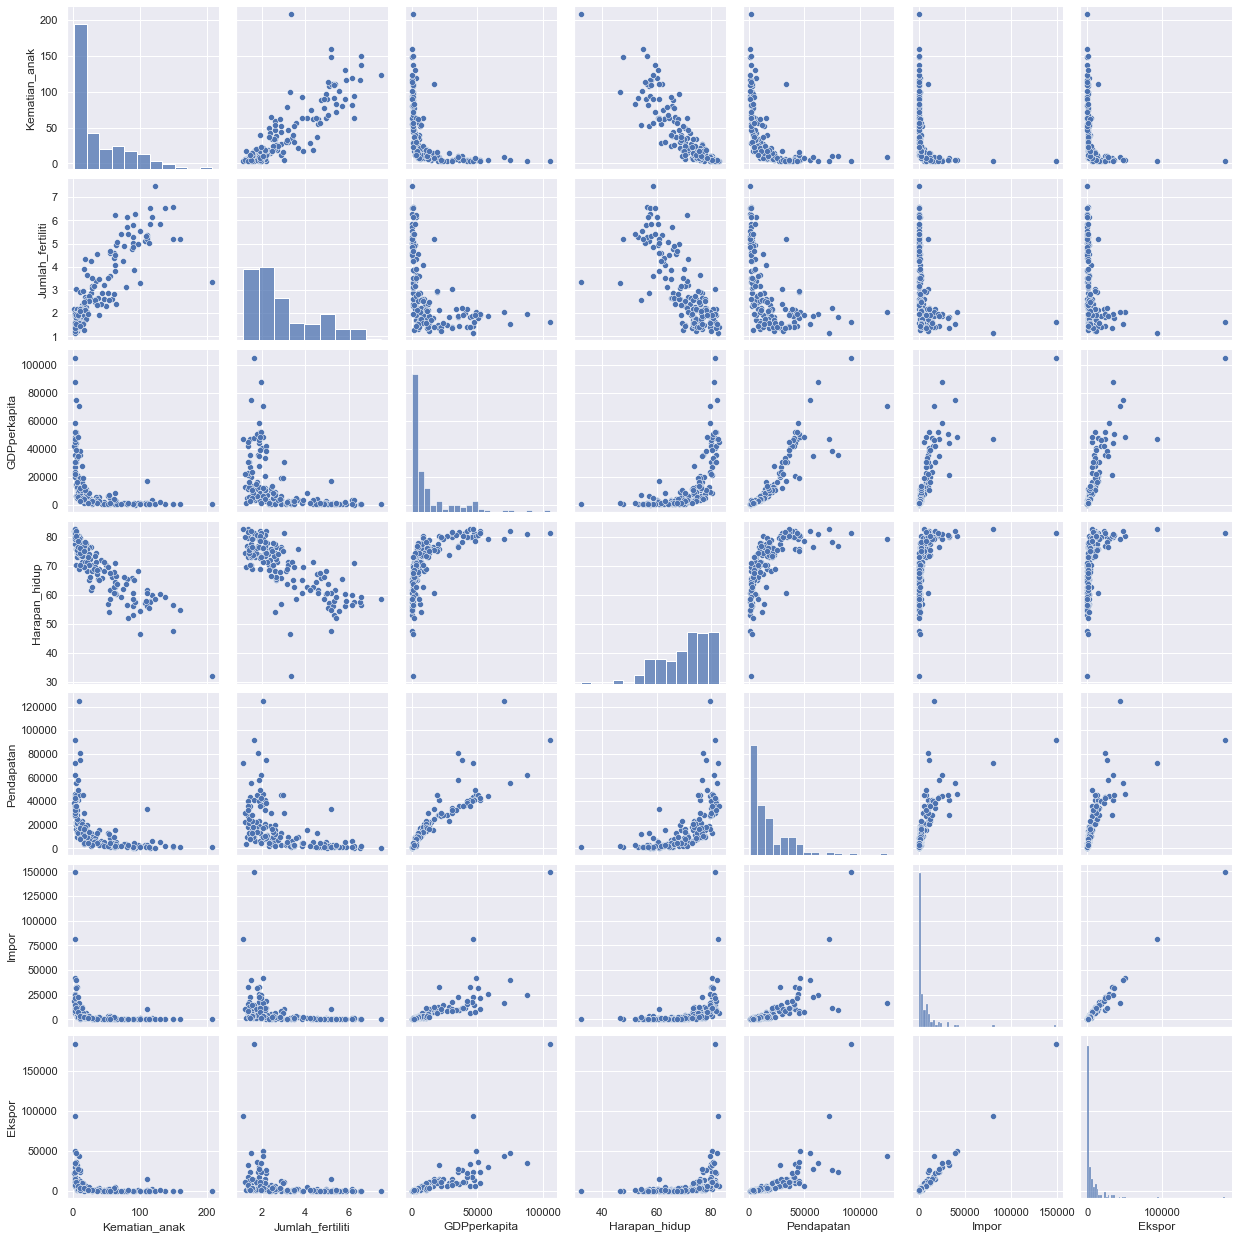

In [43]:
sns.pairplot(df, vars=["Kematian_anak", 'Jumlah_fertiliti','GDPperkapita','Harapan_hidup','Pendapatan', 'Impor', 'Ekspor'], kind='scatter')
plt.show()

- Dari pairplot di atas kita bisa melihat bagaimana variabel yang berbeda berkorelasi satu sama lain

In [44]:
Country = df.groupby('Negara').Kematian_anak.sum().sort_values(ascending=False)
Country = pd.DataFrame(Country)
Country1=Country.head()
Country2=Country.tail()
display(Country1.head())  
print('*'*50)
display(Country2.tail())

,Kematian_anak
Negara,
Haiti,208.0000
Sierra Leone,160.0000
Chad,150.0000
Central African Republic,149.0000
Mali,137.0000


**************************************************


,Kematian_anak
Negara,
Finland,3.0000
Sweden,3.0000
Singapore,2.8000
Luxembourg,2.8000
Iceland,2.6000


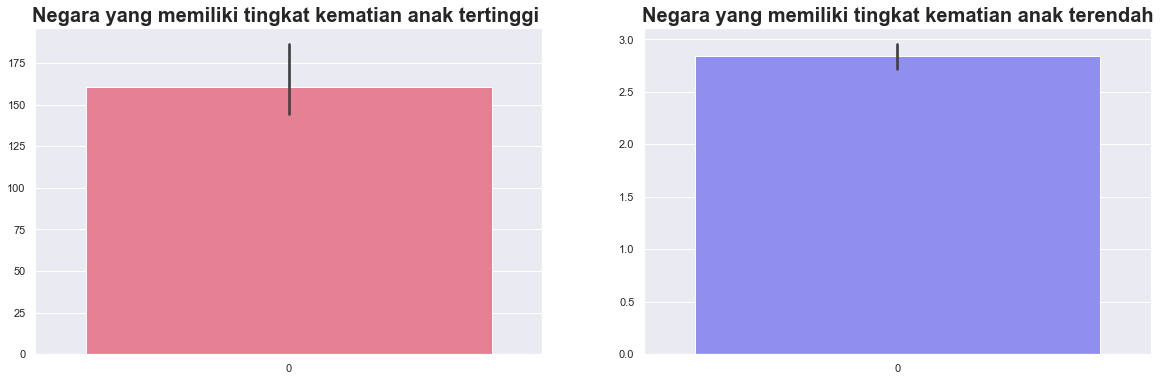

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Country1.Kematian_anak, palette='husl')
plt.title('Negara yang memiliki tingkat kematian anak tertinggi ',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Country2.Kematian_anak, palette='cool')
plt.title('Negara yang memiliki tingkat kematian anak terendah',fontweight="bold", size=20)
plt.show()

In [28]:
Income= df.groupby('Negara').Pendapatan.sum().sort_values(ascending=False)
Income=pd.DataFrame(Income)
Income1=Income.head()
Income2=Income.tail()
display(Income1)
print('*'* 50)
display(Income2)

,Pendapatan
Negara,
Qatar,125000
Luxembourg,91700
Brunei,80600
Kuwait,75200
Singapore,72100


**************************************************


,Pendapatan
Negara,
Central African Republic,888
Niger,814
Burundi,764
Liberia,700
"Congo, Dem. Rep.",609


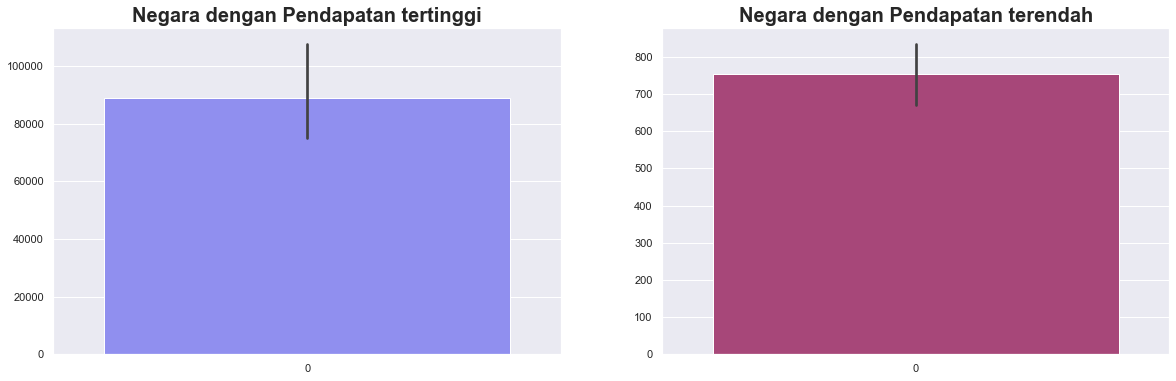

In [49]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Income1.Pendapatan, palette='cool')
plt.title('Negara dengan Pendapatan tertinggi',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Income2.Pendapatan, palette='magma')
plt.title('Negara dengan Pendapatan terendah',fontweight="bold", size=20)
plt.show()

In [50]:
GDP = df.groupby('Negara').GDPperkapita.sum().sort_values(ascending=False)
GDP = pd.DataFrame(GDP)
GDP1 = GDP.head()
GDP2 = GDP.tail()
display(GDP1)
print('*'* 50)
display(GDP2)

,GDPperkapita
Negara,
Luxembourg,105000
Norway,87800
Switzerland,74600
Qatar,70300
Denmark,58000


**************************************************


,GDPperkapita
Negara,
Sierra Leone,399
Niger,348
"Congo, Dem. Rep.",334
Liberia,327
Burundi,231


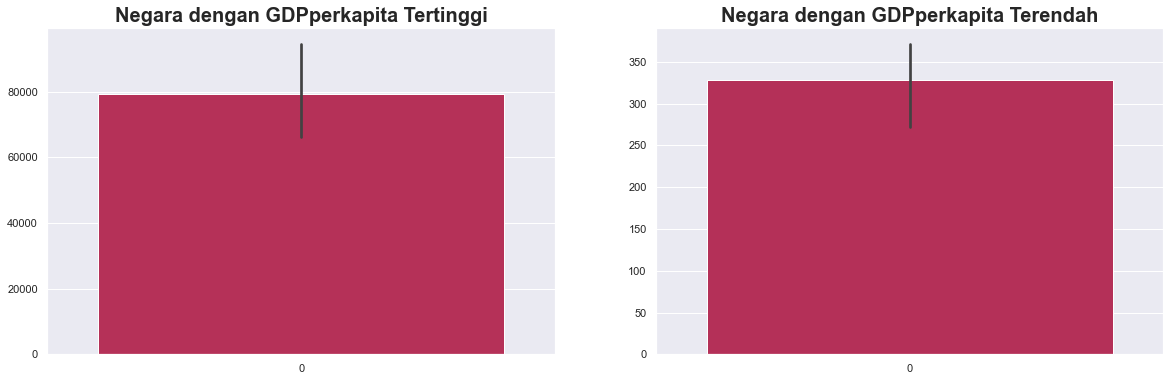

In [53]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(GDP1.GDPperkapita, palette='rocket')
plt.title('Negara dengan GDPperkapita Tertinggi',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(GDP2.GDPperkapita, palette='rocket_r')
plt.title('Negara dengan GDPperkapita Terendah',fontweight="bold", size=20)
plt.show()

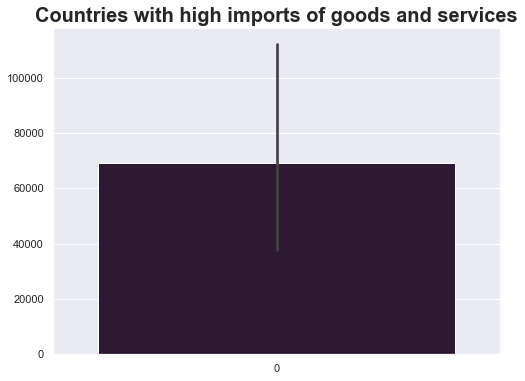

,Impor
Negara,
Luxembourg,149100.0000
Singapore,81084.0000
Ireland,42125.5000
Switzerland,39761.8000
Belgium,33166.8000


,Impor
Negara,
Burundi,90.5520
Myanmar,0.6511


In [56]:
plt.figure(figsize=(8, 6))
Imports=df.groupby('Negara').Impor.sum().sort_values(ascending=False)
Imports= pd.DataFrame(Imports)
Imports1=Imports.head()
sns.barplot(Imports1.Impor, palette='twilight')
plt.title('Countries with high imports of goods and services',fontweight="bold", size=20)
plt.show()
display(Imports1)
Imports2=Imports.tail(2)
display(Imports2)

In [57]:
Life_Ex= df.sort_values(by=['Harapan_hidup'],ascending=True)
Life_Ex.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500,5.4500,32.1000,3.3300,662
87,Lesotho,99.7000,460.9800,129.8700,1181.7000,2380,4.1500,46.5000,3.3000,1170
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446
166,Zambia,83.1000,540.2000,85.9940,451.1400,3280,14.0000,52.0000,5.4000,1460
94,Malawi,90.5000,104.6520,30.2481,160.1910,1030,12.1000,53.1000,5.3100,459


In [58]:
Life_ex=df.sort_values(by=['Harapan_hidup'],ascending=False)
display(Life_ex[0:5])

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
77,Japan,3.2000,6675.0000,4223.0500,6052.0000,35800,-1.9000,82.8000,1.3900,44500
133,Singapore,2.8000,93200.0000,1845.3600,81084.0000,72100,-0.0460,82.7000,1.1500,46600
145,Switzerland,4.5000,47744.0000,8579.0000,39761.8000,55500,0.3170,82.2000,1.5200,74600
68,Iceland,2.6000,22374.6000,3938.6000,18142.7000,38800,5.4700,82.0000,2.2000,41900
7,Australia,4.8000,10276.2000,4530.8700,10847.1000,41400,1.1600,82.0000,1.9300,51900


- Kita dapat melihat bahwa Harapan hidup lebih sedikit di Haiti, yang berarti anak yang baru lahir akan bertahan hidup selama beberapa tahun.
- Kami telah melihat di atas bahwa kematian anak juga lebih banyak terjadi di Haiti.
- Jepang memiliki harapan hidup tertinggi.

In [59]:
Exports=df.sort_values(by=['Ekspor'], ascending= False)
display(Exports[0:5])

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
91,Luxembourg,2.8000,183750.0000,8158.5000,149100.0000,91700,3.6200,81.3000,1.6300,105000
133,Singapore,2.8000,93200.0000,1845.3600,81084.0000,72100,-0.0460,82.7000,1.1500,46600
73,Ireland,4.2000,50161.0000,4475.5300,42125.5000,45700,-3.2200,80.4000,2.0500,48700
145,Switzerland,4.5000,47744.0000,8579.0000,39761.8000,55500,0.3170,82.2000,1.5200,74600
123,Qatar,9.0000,43796.9000,1272.4300,16731.4000,125000,6.9800,79.5000,2.0700,70300


In [60]:
Export=df.sort_values(by=['Ekspor'], ascending= True)
display(Export[0:5])

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
107,Myanmar,64.4000,1.0769,19.4636,0.6511,3720,7.0400,66.8000,2.4100,988
26,Burundi,93.6000,20.6052,26.7960,90.5520,764,12.3000,57.7000,6.2600,231
50,Eritrea,55.2000,23.0878,12.8212,112.3060,1420,11.6000,61.7000,4.6100,482
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553


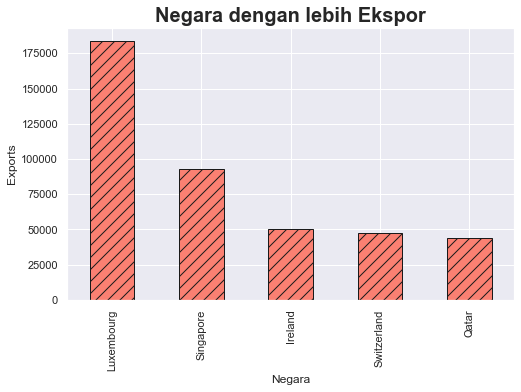

In [61]:
plt.figure(figsize=(8, 5))
df.groupby('Negara').Ekspor.sum().sort_values(ascending=False).head().plot.bar(color='salmon',hatch="//",edgecolor='k')
plt.ylabel('Exports')
plt.title('Negara dengan lebih Ekspor',fontweight="bold", size=20)
plt.show()

- Luksemburg memiliki lebih banyak ekspor barang dan jasa sekitar 183750, karena itu negara tersebut memiliki GDPperkapita tertinggi.
- Qatar adalah negara dengan ekspor paling sedikit dan di sebelahnya adalah Switzerland. Bahkan Impor lebih sedikit untuk negara-negara ini.

In [62]:
Health=df.sort_values(by=['Kesehatan'], ascending= True)
Health[0:5]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
50,Eritrea,55.2000,23.0878,12.8212,112.3060,1420,11.6000,61.7000,4.6100,482
93,Madagascar,62.2000,103.2500,15.5701,177.5900,1390,8.7900,60.8000,4.6000,413
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446
112,Niger,123.0000,77.2560,17.9568,170.8680,814,2.5500,58.8000,7.4900,348
107,Myanmar,64.4000,1.0769,19.4636,0.6511,3720,7.0400,66.8000,2.4100,988


In [63]:
Health1=df.sort_values(by=['Kesehatan'], ascending= False)
Health1[0:5]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
159,United States,7.3000,6001.6000,8663.6000,7647.2000,49400,1.2200,78.7000,1.9300,48400
145,Switzerland,4.5000,47744.0000,8579.0000,39761.8000,55500,0.3170,82.2000,1.5200,74600
114,Norway,3.2000,34856.6000,8323.4400,25023.0000,62300,5.9500,81.0000,1.9500,87800
91,Luxembourg,2.8000,183750.0000,8158.5000,149100.0000,91700,3.6200,81.3000,1.6300,105000
44,Denmark,4.1000,29290.0000,6612.0000,25288.0000,44000,3.2200,79.5000,1.8700,58000


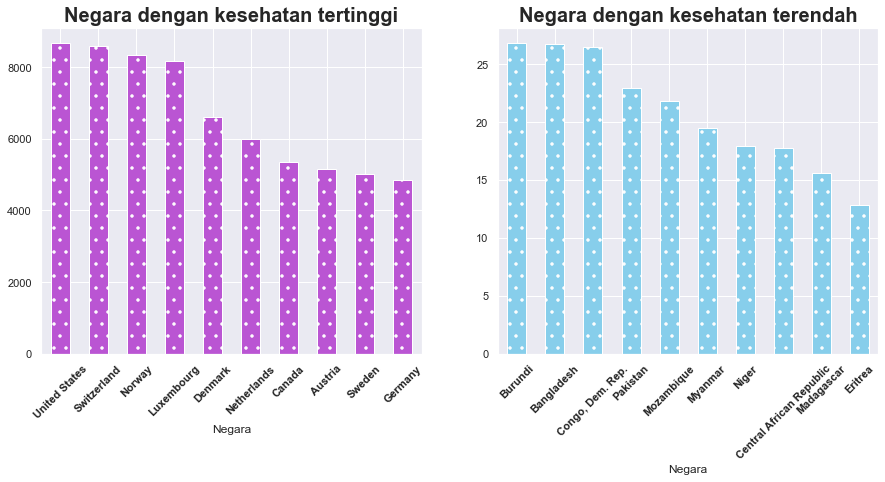

In [64]:
plt.figure(figsize=(15, 6))
He=df.groupby('Negara').Kesehatan.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
He1=He.head(10).plot.bar(color='mediumorchid',hatch=".")
plt.title('Negara dengan kesehatan tertinggi',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
He2=He.tail(10).plot.bar(color= 'skyblue',hatch='.')
plt.title('Negara dengan kesehatan terendah',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

- Amerika Serikat membelanjakan lebih banyak per orang untuk kesehatan daripada negara-negara yang sebanding yaitu 8663.
- Eritrea menghabiskan lebih sedikit untuk kesehatan

In [65]:
Fertility=df.sort_values(by=['Jumlah_fertiliti'], ascending= True).head()
Fertility

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
133,Singapore,2.8000,93200.0000,1845.3600,81084.0000,72100,-0.0460,82.7000,1.1500,46600
138,South Korea,4.1000,10917.4000,1531.5300,10210.2000,30400,3.1600,80.1000,1.2300,22100
67,Hungary,6.0000,10715.8000,960.2300,10021.5000,22300,2.3300,74.5000,1.2500,13100
102,Moldova,17.2000,638.9600,190.7100,1279.5500,3910,11.1000,69.7000,1.2700,1630
20,Bosnia and Herzegovina,6.9000,1369.1700,511.7100,2364.9300,9720,1.4000,76.8000,1.3100,4610


In [66]:
Fertility1=df.sort_values(by=['Jumlah_fertiliti'], ascending=False).head()
Fertility1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
112,Niger,123.0000,77.2560,17.9568,170.8680,814,2.5500,58.8000,7.4900,348
32,Chad,150.0000,330.0960,40.6341,390.1950,1930,6.3900,56.5000,6.5900,897
97,Mali,137.0000,161.4240,35.2584,248.5080,1870,4.3700,59.5000,6.5500,708
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609,20.8000,57.5000,6.5400,334
26,Burundi,93.6000,20.6052,26.7960,90.5520,764,12.3000,57.7000,6.2600,231


In [67]:
df.Jumlah_fertiliti.max()

7.49

In [68]:
df.Harapan_hidup.max()

82.8

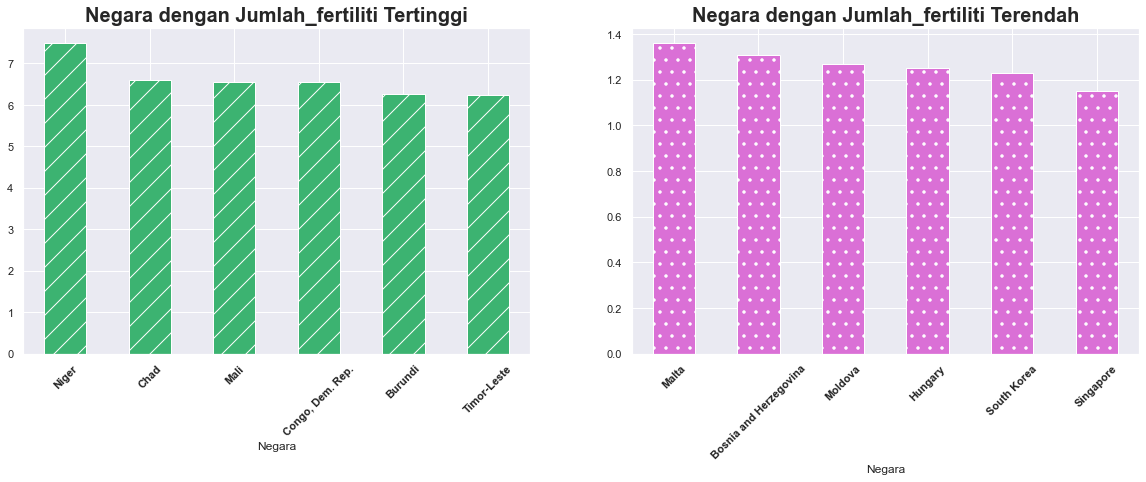

In [69]:
plt.figure(figsize=(20, 6))
Fe=df.groupby('Negara').Jumlah_fertiliti.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
Fe1=Fe.head(6).plot.bar(color='mediumseagreen',hatch="/")
plt.title('Negara dengan Jumlah_fertiliti Tertinggi',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
Fe2=Fe.tail(6).plot.bar(color= 'orchid',hatch='.')
plt.title('Negara dengan Jumlah_fertiliti Terendah',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

- Jumlah anak yang lahir dari setiap wanita lebih sedikit, dapat bertahan hidup lebih banyak, Seperti yang kita lihat Singapura, Korea Selatan memiliki harapan hidup lebih tinggi dan kesuburan total lebih sedikit.
- Chad, Mali dan Republik Kongo Dem memiliki kesuburan dan moralitas anak yang sangat tinggi

In [70]:
In=df.sort_values(by=['Inflasi'], ascending=False).head()
In

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
113,Nigeria,130.0000,589.4900,118.1310,405.4200,5150,104.0000,60.5000,5.8400,2330
163,Venezuela,17.1000,3847.5000,662.8500,2376.0000,16500,45.9000,75.4000,2.4700,13500
103,Mongolia,26.1000,1237.5500,144.1600,1502.5500,7710,39.2000,66.2000,2.6400,2650
149,Timor-Leste,62.6000,79.2000,328.3200,1000.8000,1850,26.5000,71.1000,6.2300,3600
49,Equatorial Guinea,111.0000,14671.8000,766.0800,10071.9000,33700,24.9000,60.9000,5.2100,17100


In [71]:
In=df.sort_values(by=['Inflasi'], ascending=True).head()
In

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
131,Seychelles,14.4000,10130.4000,367.2000,11664.0000,20400,-4.2100,73.4000,2.1700,10800
73,Ireland,4.2000,50161.0000,4475.5300,42125.5000,45700,-3.2200,80.4000,2.0500,48700
77,Japan,3.2000,6675.0000,4223.0500,6052.0000,35800,-1.9000,82.8000,1.3900,44500
43,Czech Republic,3.4000,13068.0000,1560.2400,12454.2000,28300,-1.4300,77.5000,1.5100,19800
135,Slovenia,3.2000,15046.2000,2201.9400,14718.6000,28700,-0.9870,79.5000,1.5700,23400


Nigeria mengalami tingkat inflasi yang tinggi sedangkan Jepang, Irlandia memiliki tingkat inflasi yang sangat rendah

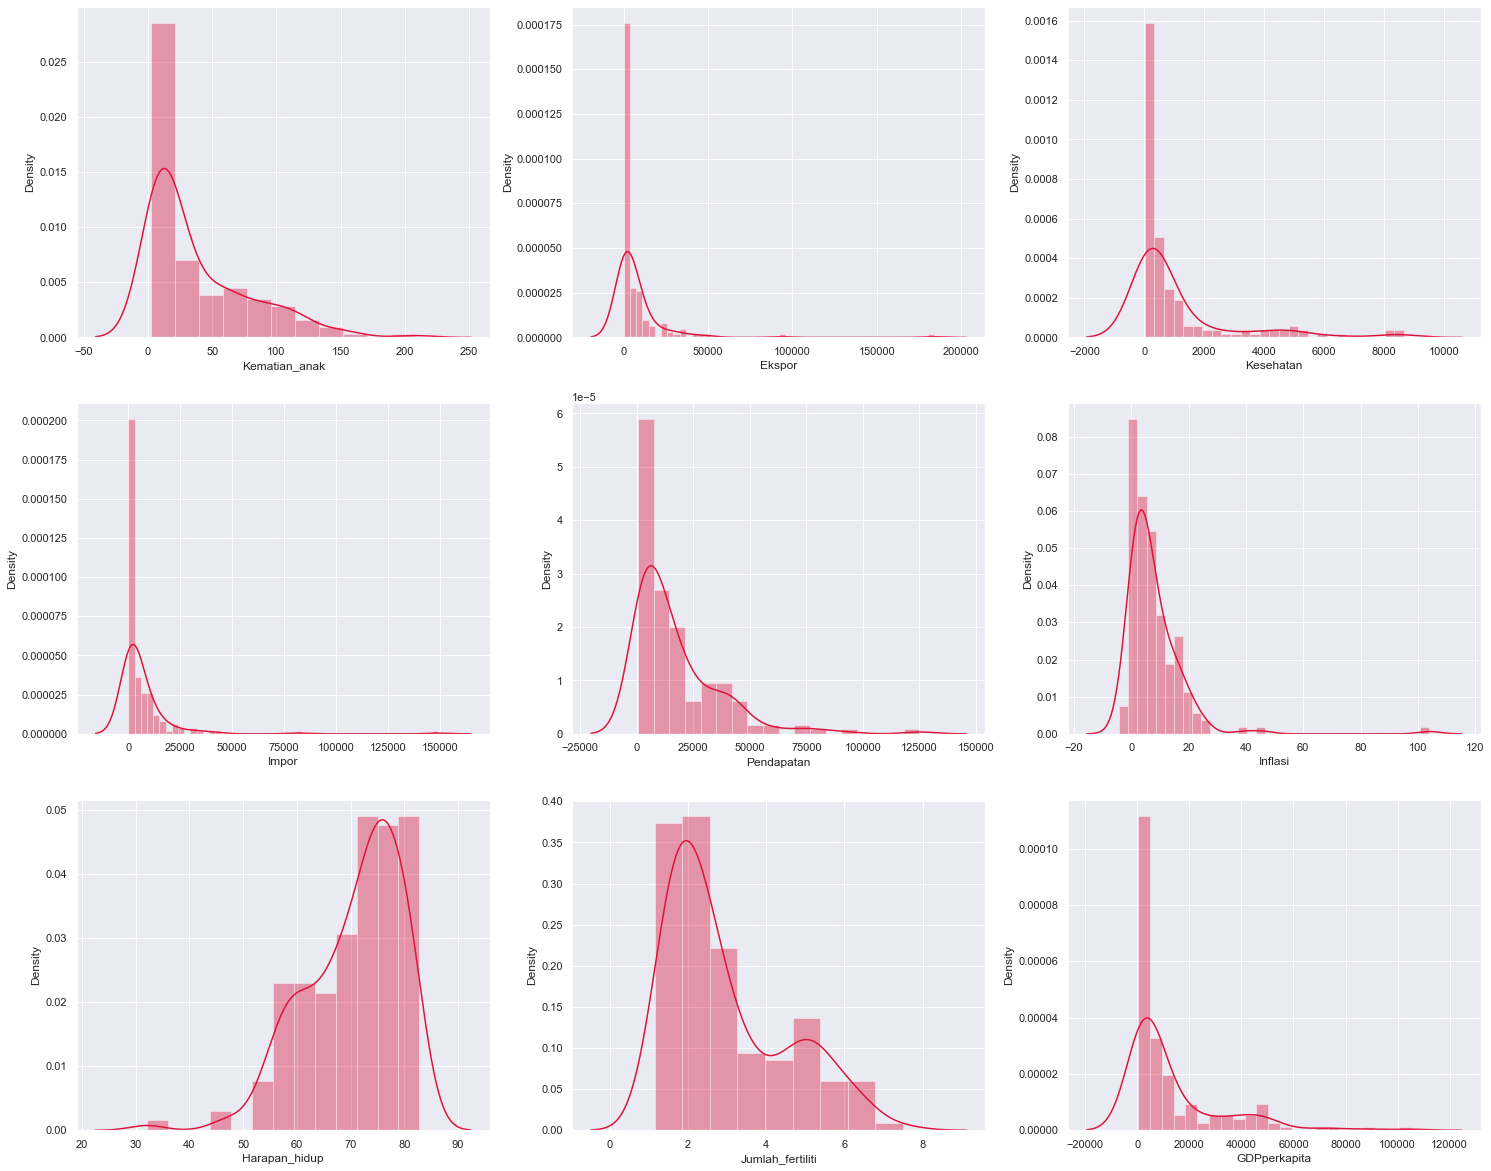

In [72]:
plt.figure(figsize = (20,16))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]], color='crimson')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)

- Dengan melihat plot kita dapat melihat bahwa Kematian Anak, Pendapatan dan GDPperkapita adalah tiga kolom yang memiliki variasi data.
- Karenanya kita dapat mempertimbangkan ketiga kolom ini untuk profil cluster.

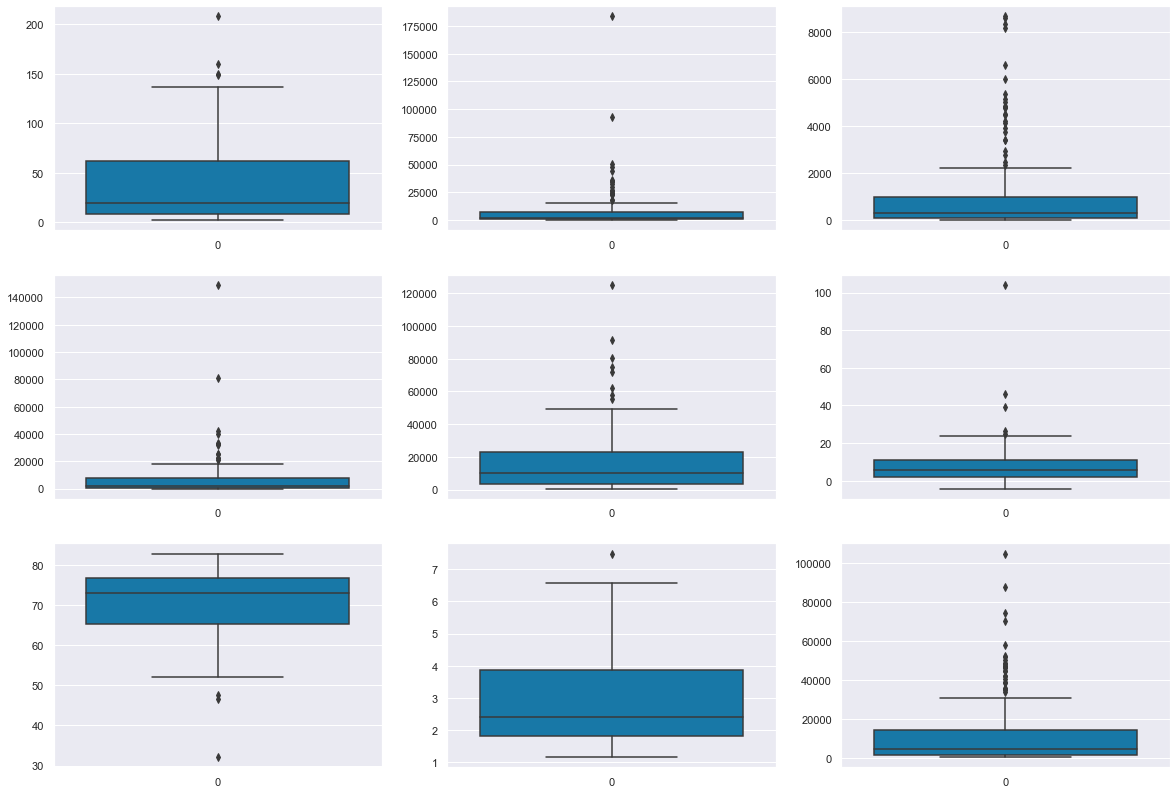

In [73]:
plt.figure(figsize = (20,14))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]],palette='winter')

- Ada outlier dalam data. kita perlu memperlakukannya sebagai Proses pengelompokan sangat sensitif terhadap keberadaan outlier dalam data.

In [74]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,7420.6188,1056.7332,6588.3521,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,17973.8858,1801.4089,14710.8104,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,1.0769,12.8212,0.6511,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,183750.0000,8663.6000,149100.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [77]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [78]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [80]:
hopkins(df.drop('Negara', axis = 1))

0.9340227587469149

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('Negara', axis = 1))
df1

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [82]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.2915,-0.4110,-0.5650,-0.4323,-0.8082,0.1573,-1.6191,1.9029,-0.6792
1,-0.5389,-0.3502,-0.4392,-0.3137,-0.3754,-0.3123,0.6479,-0.8600,-0.4856
2,-0.2728,-0.3185,-0.4848,-0.3537,-0.2208,0.7893,0.6704,-0.0384,-0.4654
3,2.0078,-0.2914,-0.5324,-0.3460,-0.5850,1.3871,-1.1792,2.1282,-0.5163
4,-0.6956,-0.1043,-0.1788,0.0407,0.1017,-0.6017,0.7043,-0.5419,-0.0418


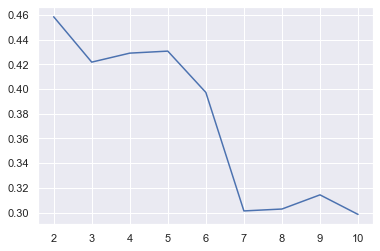

In [83]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

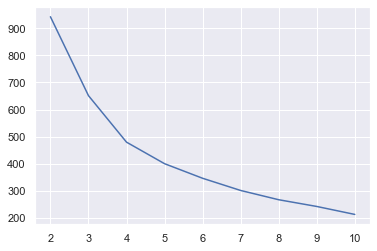

In [84]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

In [85]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=50)

In [86]:
df_kmean = df.copy()

In [87]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,1
2,1
3,2
4,1


In [88]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,1
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,1
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,1


In [89]:
df_kmean.label.value_counts()

1    91
2    48
0    28
Name: label, dtype: int64

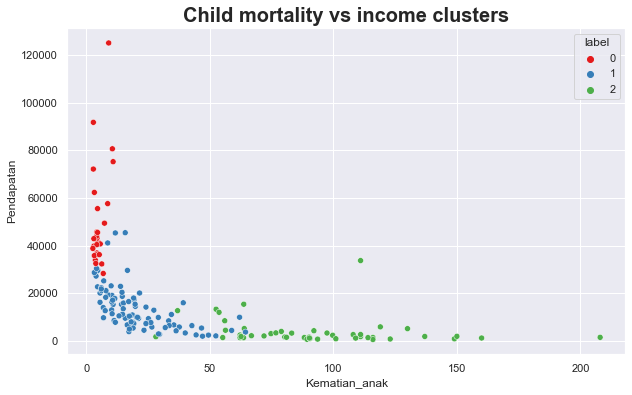

In [90]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Kematian_anak', y = 'Pendapatan', hue = 'label', data = df_kmean, palette = 'Set1')
plt.title('Child mortality vs income clusters',fontweight="bold", size=20)

plt.show()